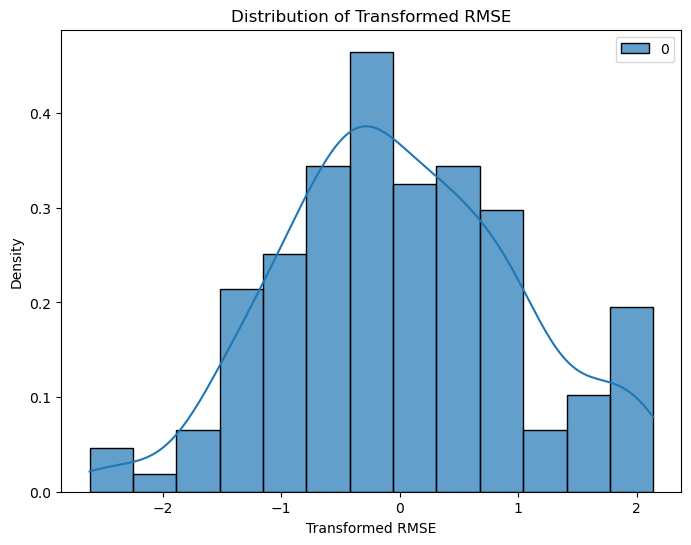

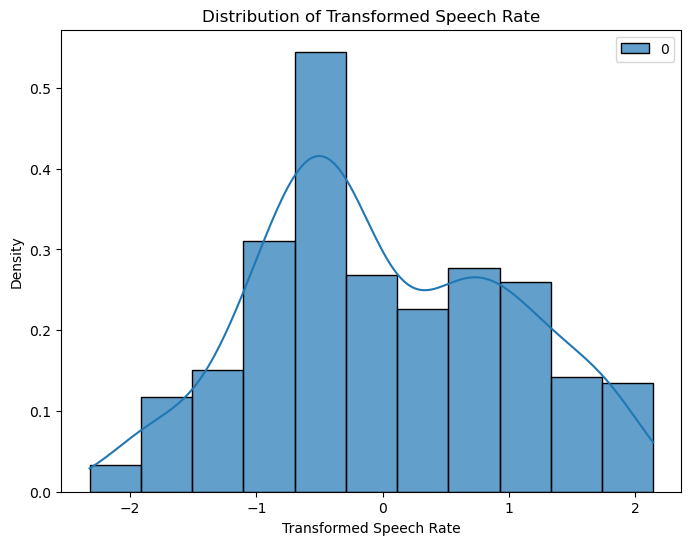

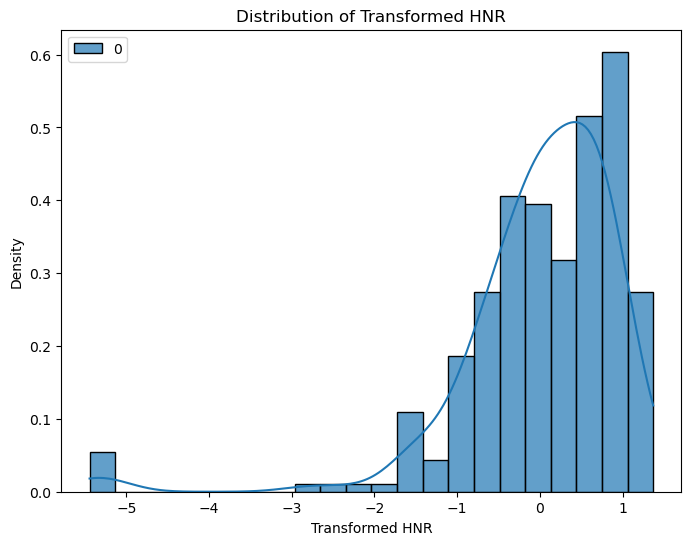

NameError: name 'AudioSegment' is not defined

In [3]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Folder containing the audio files
audio_folder = "/Volumes/MyBook/ADRC/Segmented ADRC Audio/All"

# Load the data from Excel into a DataFrame
excel_path = "/Volumes/MyBook/ADRC/csf_2022_averaged_labels_AD.xlsx"
data_df = pd.read_excel(excel_path)

# Define a list of features
features = ["RMSE", "Speech Rate", "HNR", "Formants", "MFCCs", "Mel Spectrogram", "Spectral Centroid"]

# Iterate over each feature
for feature in features:
    # Lists to store extracted features
    all_data = []

    # Loop through patient IDs in the DataFrame
    for idx, row in data_df.iterrows():
        patient_id = row["PatientID"]
        sex = row["Sex"]

        # Filter data for male patients
        if sex not in ["F", "M"]:
            continue

        # Iterate through audio files in the folder
        for filename in os.listdir(audio_folder):
            if filename.startswith(f"{patient_id}_") and filename.endswith(".wav"):
                audio_filepath = os.path.join(audio_folder, filename)

                # Load the audio file
                y, sr = librosa.load(audio_filepath)

                # Extract the feature based on the current iteration
                if feature == "RMSE":
                    feature_value = np.mean(librosa.feature.rms(y=y))
                elif feature == "Speech Rate":
                    feature_value = len(librosa.effects.split(y)) / (len(y) / sr) * 60
                elif feature == "HNR":
                    hnr = librosa.effects.harmonic(y)
                    feature_value = np.mean(hnr)
                elif feature == "Formants":
                    sound = AudioSegment.from_wav(audio_filepath)
                    feature_value = np.mean(sound.dBFS)
                elif feature == "MFCCs":
                    mfccs = librosa.feature.mfcc(y=y, sr=sr)
                    feature_value = np.mean(mfccs)
                elif feature == "Mel Spectrogram":
                    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
                    feature_value = np.mean(mel_spectrogram)
                elif feature == "Spectral Centroid":
                    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
                    feature_value = np.mean(spectral_centroids)

                all_data.append(feature_value)

    # Convert the list to a NumPy array
    X = np.array(all_data).reshape(-1, 1)

    # Apply power transformation
    power_transformer = PowerTransformer()
    X_transformed = power_transformer.fit_transform(X)

    # Plot the distribution of the transformed feature
    plt.figure(figsize=(8, 6))
    sns.histplot(X_transformed, kde=True, stat="density", color='skyblue', alpha=0.7)

    plt.title(f'Distribution of Transformed {feature}')
    plt.xlabel(f'Transformed {feature}')
    plt.ylabel('Density')
    plt.show()


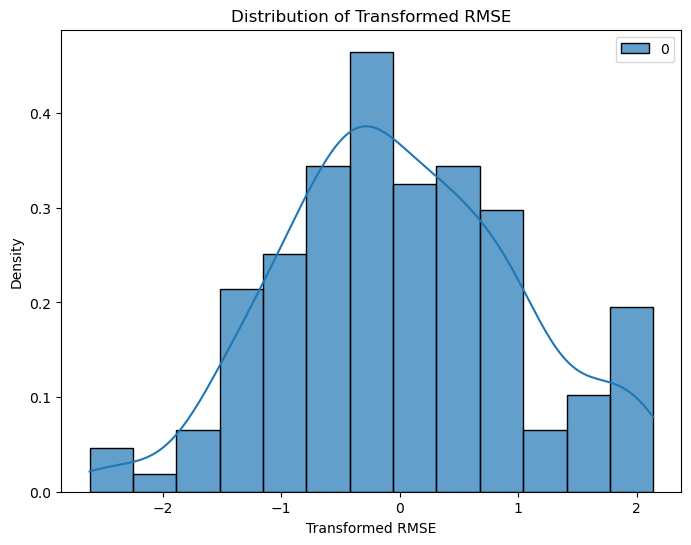

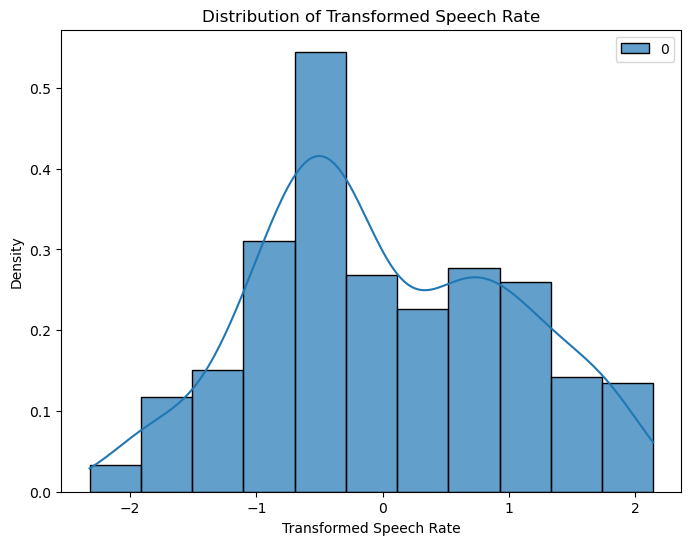

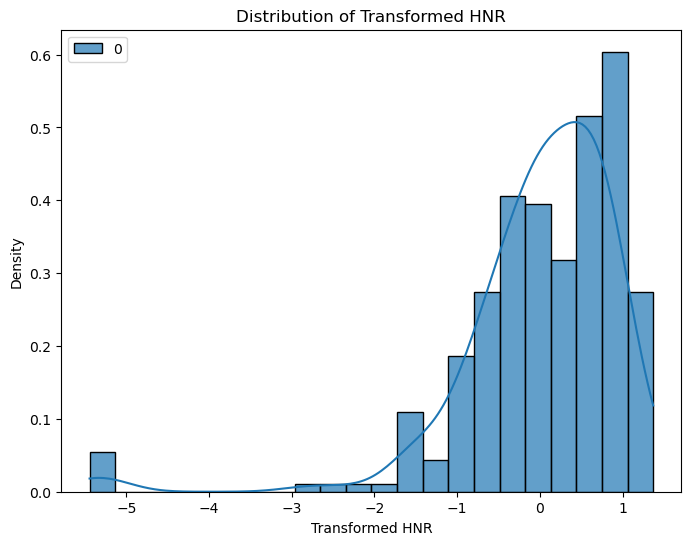

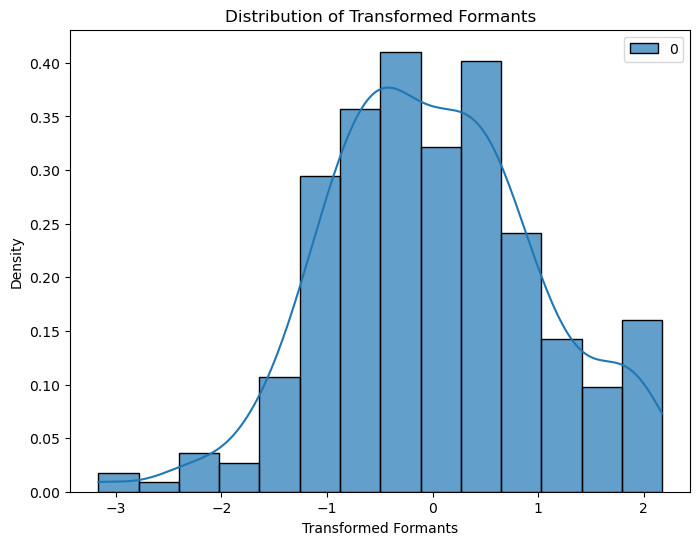

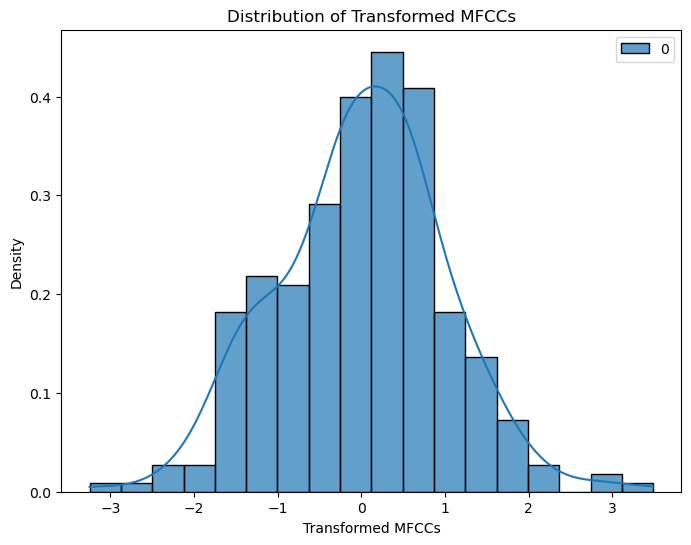

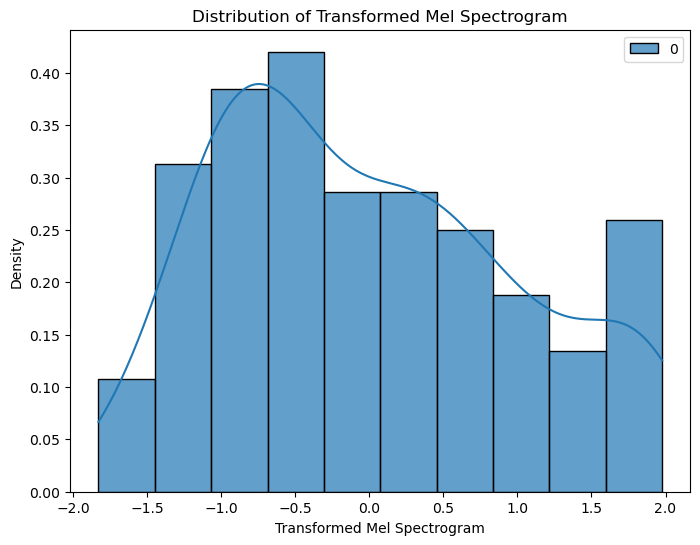

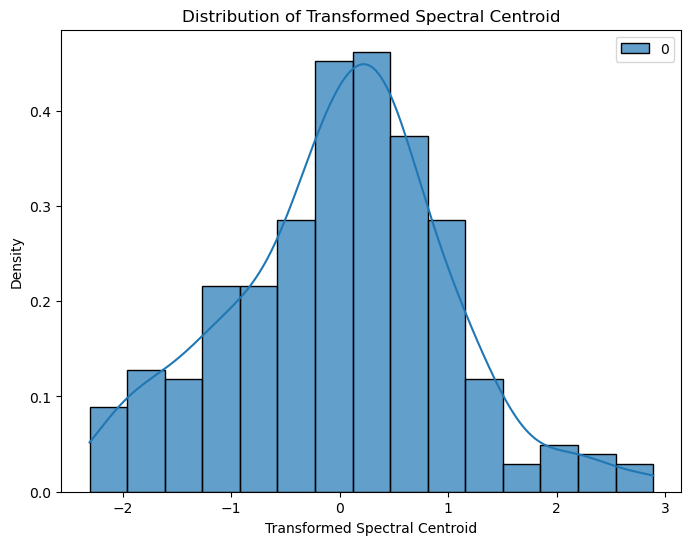

In [6]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from pydub import AudioSegment


# Folder containing the audio files
audio_folder = "/Volumes/MyBook/ADRC/Segmented ADRC Audio/All"

# Load the data from Excel into a DataFrame
excel_path = "/Volumes/MyBook/ADRC/csf_2022_averaged_labels_AD.xlsx"
data_df = pd.read_excel(excel_path)

# Define a list of features
features = ["RMSE", "Speech Rate", "HNR", "Formants", "MFCCs", "Mel Spectrogram", "Spectral Centroid"]

# Iterate over each feature
for feature in features:
    # Lists to store extracted features
    all_data = []

    # Loop through patient IDs in the DataFrame
    for idx, row in data_df.iterrows():
        patient_id = row["PatientID"]
        sex = row["Sex"]

        # Filter data for male patients
        if sex not in ["F", "M"]:
            continue

        # Iterate through audio files in the folder
        for filename in os.listdir(audio_folder):
            if filename.startswith(f"{patient_id}_") and filename.endswith(".wav"):
                audio_filepath = os.path.join(audio_folder, filename)

                # Load the audio file
                y, sr = librosa.load(audio_filepath)

                # Extract the feature based on the current iteration
                if feature == "RMSE":
                    feature_value = np.mean(librosa.feature.rms(y=y))
                elif feature == "Speech Rate":
                    feature_value = len(librosa.effects.split(y)) / (len(y) / sr) * 60
                elif feature == "HNR":
                    hnr = librosa.effects.harmonic(y)
                    feature_value = np.mean(hnr)
                elif feature == "Formants":
                    sound = AudioSegment.from_wav(audio_filepath)
                    feature_value = np.mean(sound.dBFS)
                elif feature == "MFCCs":
                    mfccs = librosa.feature.mfcc(y=y, sr=sr)
                    feature_value = np.mean(mfccs)
                elif feature == "Mel Spectrogram":
                    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
                    feature_value = np.mean(mel_spectrogram)
                elif feature == "Spectral Centroid":
                    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
                    feature_value = np.mean(spectral_centroids)

                all_data.append(feature_value)

    # Convert the list to a NumPy array
    X = np.array(all_data).reshape(-1, 1)

    # Apply power transformation
    power_transformer = PowerTransformer()
    X_transformed = power_transformer.fit_transform(X)

    # Plot the distribution of the transformed feature
    plt.figure(figsize=(8, 6))
    sns.histplot(X_transformed, kde=True, stat="density", color='skyblue', alpha=0.7)

    plt.title(f'Distribution of Transformed {feature}')
    plt.xlabel(f'Transformed {feature}')
    plt.ylabel('Density')
    plt.show()


In [5]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Folder containing the audio files
audio_folder = "/Volumes/MyBook/ADRC/Segmented ADRC Audio/All"

# Load the data from Excel into a DataFrame
excel_path = "/Volumes/MyBook/ADRC/csf_2022_averaged_labels_AD.xlsx"
data_df = pd.read_excel(excel_path)

# Define a list of features
features = ["RMSE", "Speech Rate", "HNR", "Formants", "MFCCs", "Mel Spectrogram", "Spectral Centroid"]

# Iterate over each feature
for feature in features:
    # Lists to store extracted features
    all_data = []
    all_labels = []

    # Loop through patient IDs in the DataFrame
    for idx, row in data_df.iterrows():
        patient_id = row["PatientID"]
        sex = row["Sex"]

        # Filter data for male patients
        if sex not in ["F", "M"]:
            continue

        # Iterate through audio files in the folder
        for filename in os.listdir(audio_folder):
            if filename.startswith(f"{patient_id}_") and filename.endswith(".wav"):
                audio_filepath = os.path.join(audio_folder, filename)

                # Load the audio file
                y, sr = librosa.load(audio_filepath)

                # Extract the feature based on the current iteration
                if feature == "RMSE":
                    feature_value = np.mean(librosa.feature.rms(y=y))
                elif feature == "Speech Rate":
                    feature_value = len(librosa.effects.split(y)) / (len(y) / sr) * 60
                elif feature == "HNR":
                    hnr = librosa.effects.harmonic(y)
                    feature_value = np.mean(hnr)
                elif feature == "Formants":
                    sound = AudioSegment.from_wav(audio_filepath)
                    feature_value = np.mean(sound.dBFS)
                elif feature == "MFCCs":
                    mfccs = librosa.feature.mfcc(y=y, sr=sr)
                    feature_value = np.mean(mfccs)
                elif feature == "Mel Spectrogram":
                    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
                    feature_value = np.mean(mel_spectrogram)
                elif feature == "Spectral Centroid":
                    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
                    feature_value = np.mean(spectral_centroids)

                all_data.append(feature_value)
                all_labels.append(row["CSF Biomarker"])

    # Convert the lists to NumPy arrays
    X = np.array(all_data).reshape(-1, 1)
    y = np.array(all_labels)

    # Apply power transformation
    power_transformer = PowerTransformer()
    X_transformed = power_transformer.fit_transform(X)

    # Perform linear regression
    model = LinearRegression()
    model.fit(X_transformed, y)

    # Predict CSF biomarkers
    y_pred = model.predict(X_transformed)

    # Calculate R^2
    r2 = r2_score(y, y_pred)
    print(f"R^2 for {feature}: {r2}")


KeyError: 'CSF Biomarker'